In [55]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [56]:
data = pd.read_csv("../../data/kgh_2005_beta.csv")
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4754 entries, 0 to 4753
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Data        4754 non-null   object 
 1   Otwarcie    4754 non-null   float64
 2   Najwyzszy   4754 non-null   float64
 3   Najnizszy   4754 non-null   float64
 4   Zamkniecie  4754 non-null   float64
 5   Wolumen     4754 non-null   float64
 6   Zwrot       4753 non-null   float64
 7   Beta        4664 non-null   float64
dtypes: float64(7), object(1)
memory usage: 297.3+ KB
None


In [57]:
data['Data'] = pd.to_datetime(data['Data'])
data.dropna(inplace=True)

In [58]:
X = np.arange(len(data)).reshape(-1, 1)
y = data['Beta']

In [59]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, shuffle=False)

In [60]:
# Definiowanie modelu
model_rf = RandomForestRegressor(random_state=42)

# Definiowanie siatki parametrów
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Przeprowadzenie Grid Search
grid_search = GridSearchCV(estimator=model_rf, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 108 candidates, totalling 324 fits


GridSearchCV(cv=3, estimator=RandomForestRegressor(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20, 30],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]},
             verbose=2)

In [61]:
# Najlepsze parametry
best_params = grid_search.best_params_
print('Best parameters found: ', best_params)

# Wytrenowanie modelu na najlepszych parametrach
best_model_rf = RandomForestRegressor(**best_params, random_state=42)
best_model_rf.fit(X_train, y_train)

Best parameters found:  {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}


RandomForestRegressor(n_estimators=200, random_state=42)

In [62]:
# Ocena modelu
predictions_rf = best_model_rf.predict(X_test)
#mse = mean_squared_error(y_test, predictions_rf, squared=False)
rmse = mean_squared_error(y_test, predictions_rf, squared=False)
mae = mean_absolute_error(y_test, predictions_rf)

print('Random Forest Test RMSE:', rmse)
print('Random Forest Test MAE:', mae)

Random Forest Test RMSE: 0.21380395651978765
Random Forest Test MAE: 0.17767544637759228


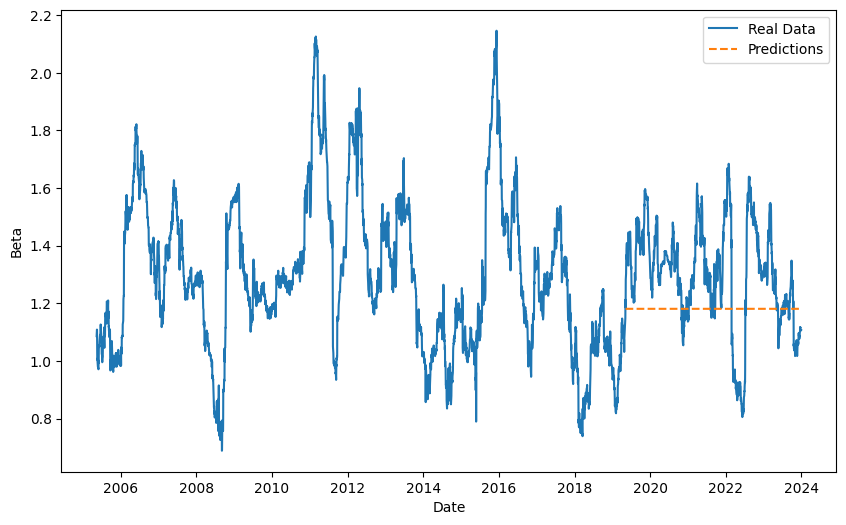

In [63]:
# Wizualizacja wyników
plt.figure(figsize=(10, 6))
plt.plot(data['Data'], y, label='Real Data')
plt.plot(data['Data'][len(X_train):], predictions_rf, label='Predictions', linestyle='--')
plt.xlabel('Date')
plt.ylabel('Beta')
plt.legend()
plt.show()